# <b> Exploratory Data Analysis: Failed Bank List
### Author: Clayton Seabaugh
### Date: 9/27/2024

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import plotly.express as px
import kaleido

In [2]:
df = pd.read_csv(r'C:\Users\clayt\Documents\datafun-06-eda\banklist.csv',  encoding='ISO-8859-1')
print(df.head)

<bound method NDFrame.head of                                 Bank Name           City  State   Cert   \
0    Republic First Bank dba Republic Bank   Philadelphia     PA  27332   
1                            Citizens Bank       Sac City     IA   8758   
2                 Heartland Tri-State Bank        Elkhart     KS  25851   
3                      First Republic Bank  San Francisco     CA  59017   
4                           Signature Bank       New York     NY  57053   
..                                     ...            ...    ...    ...   
564                     Superior Bank, FSB       Hinsdale     IL  32646   
565                    Malta National Bank          Malta     OH   6629   
566        First Alliance Bank & Trust Co.     Manchester     NH  34264   
567      National State Bank of Metropolis     Metropolis     IL   3815   
568                       Bank of Honolulu       Honolulu     HI  21029   

                  Acquiring Institution  Closing Date    Fund  
0    

### Initial Data Inspection

In [3]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

                              Bank Name               City  State   Cert   \
0  Republic First Bank dba Republic Bank       Philadelphia     PA  27332   
1                          Citizens Bank           Sac City     IA   8758   
2               Heartland Tri-State Bank            Elkhart     KS  25851   
3                    First Republic Bank      San Francisco     CA  59017   
4                         Signature Bank           New York     NY  57053   
5                    Silicon Valley Bank        Santa Clara     CA  24735   
6                      Almena State Bank             Almena     KS  15426   
7             First City Bank of Florida  Fort Walton Beach     FL  16748   
8                   The First State Bank      Barboursville     WV  14361   
9                     Ericson State Bank            Ericson     NE  18265   

                Acquiring Institution  Closing Date    Fund  
0    Fulton Bank, National Association     26-Apr-24  10546  
1            Iowa Trust & Sa

In [4]:
# Remove leading/trailing spaces to clean head
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund'],
      dtype='object')


### Initial Descriptive Statistics

In [5]:
print(df.describe())

               Cert          Fund
count    569.000000    569.000000
mean   31653.056239  10042.210896
std    16464.868900   1110.637083
min       91.000000   4645.000000
25%    20115.000000  10118.000000
50%    32102.000000  10260.000000
75%    35372.000000  10402.000000
max    59017.000000  10546.000000


### Initial Data Distribution for Numerical Columns

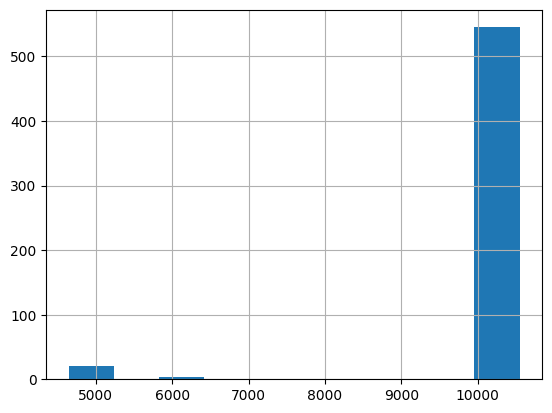

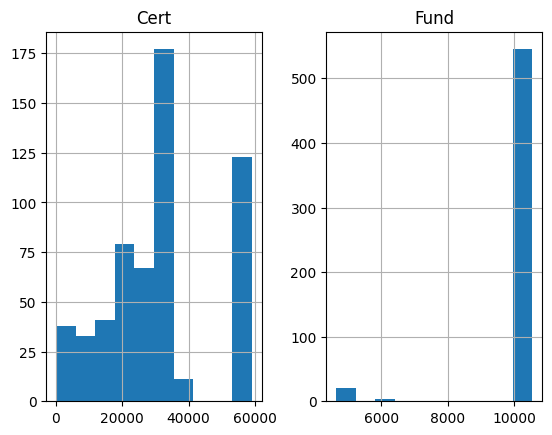

In [6]:
# Inspect histogram for "fund" column
df['Fund'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Initial Data Distribution for Categorical Columns

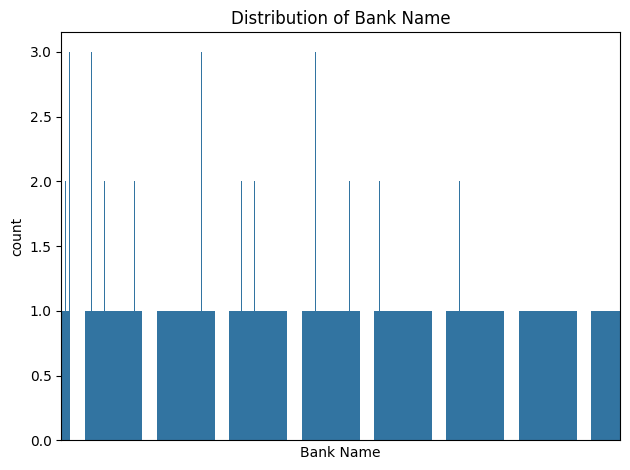

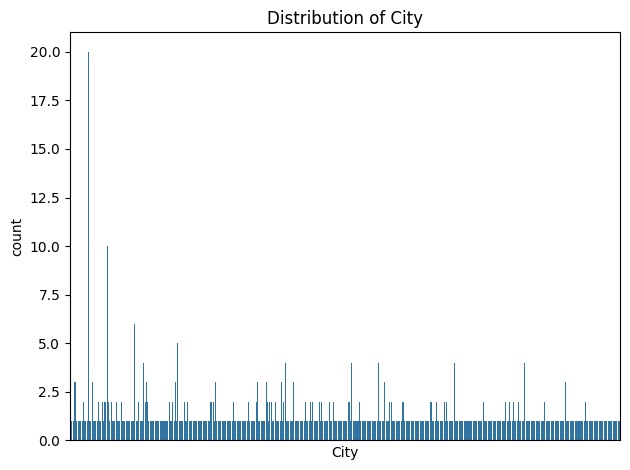

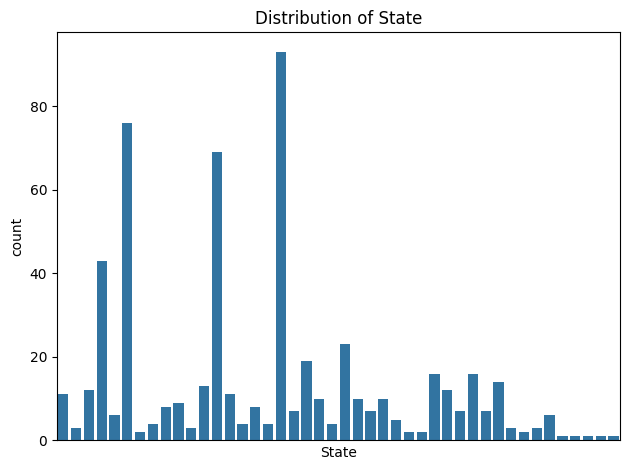

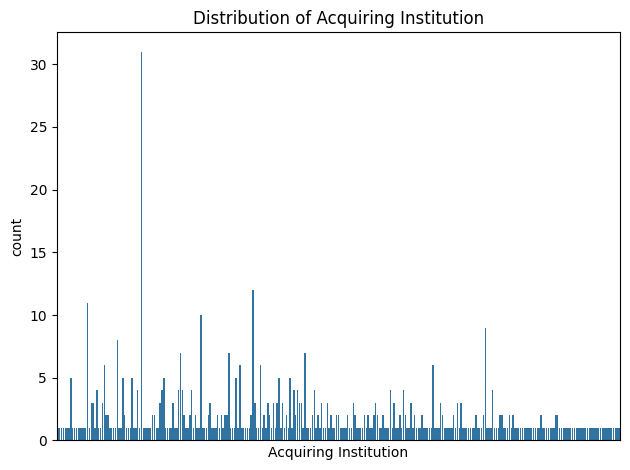

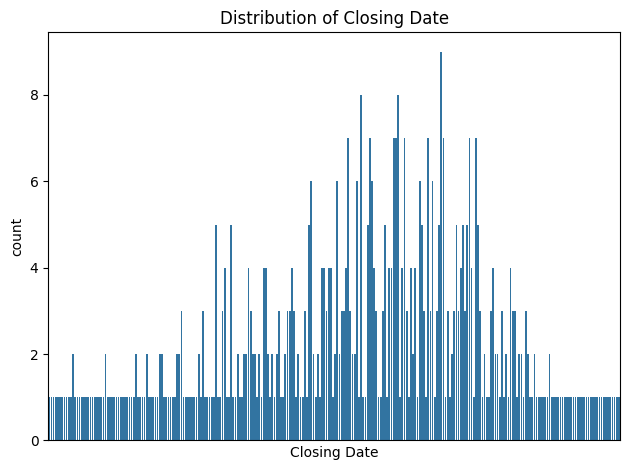

In [7]:
# Inspect value counts by categorical column
df['Acquiring Institution'].value_counts()

# Inspect value counts bfor all categorical column
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.xticks([])   
    plt.xscale
    plt.tight_layout()
    plt.show()

plt.show()

### Rename and Add Columns
Rename and add a column to the database to showcase transformations.

In [14]:
df['Assets'] = '0'
df = df.rename(columns={'Assets': 'Total Assets'})
print(df)

                                 Bank Name           City State   Cert  \
0    Republic First Bank dba Republic Bank   Philadelphia    PA  27332   
1                            Citizens Bank       Sac City    IA   8758   
2                 Heartland Tri-State Bank        Elkhart    KS  25851   
3                      First Republic Bank  San Francisco    CA  59017   
4                           Signature Bank       New York    NY  57053   
..                                     ...            ...   ...    ...   
564                     Superior Bank, FSB       Hinsdale    IL  32646   
565                    Malta National Bank          Malta    OH   6629   
566        First Alliance Bank & Trust Co.     Manchester    NH  34264   
567      National State Bank of Metropolis     Metropolis    IL   3815   
568                       Bank of Honolulu       Honolulu    HI  21029   

                   Acquiring Institution Closing Date   Fund Total Assets  
0      Fulton Bank, National Associ

### Exploration
With the initialization of the data, I explore below different aspects of the data display the insights gathered.

### Acquiring Institutions Exploration
Below I explore what insitutions acquired failing banks and what institutions were more prone to acquiring these banks.

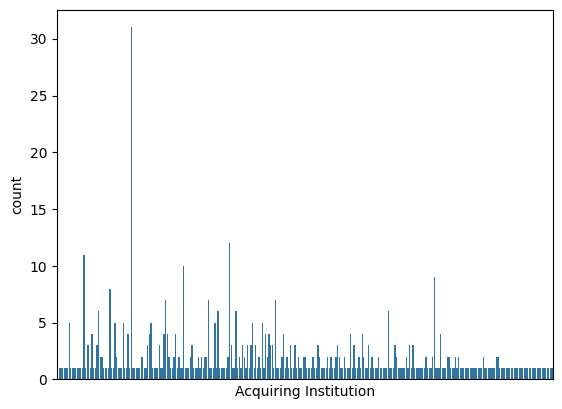

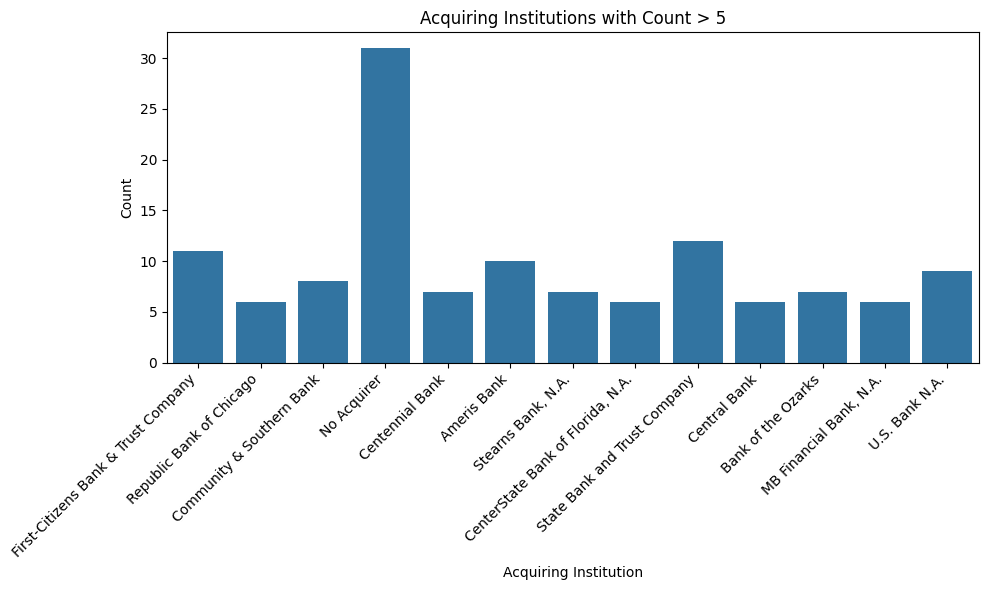

In [9]:
# Show all of Acquiring Institutions to compare 

df['Acquiring Institution'].value_counts() 
sns.countplot(x = 'Acquiring Institution', data=df)

# Remove x names for readability
plt.xticks([])


# Creating count plot of the amount of acquring institutions greater than 5

# Step 1: Get the value counts and filter for counts > 5
institution_counts = df['Acquiring Institution'].value_counts()
filtered_institutions = institution_counts[institution_counts > 5].index

# Step 2: Filter the original DataFrame for these institutions
filtered_df = df[df['Acquiring Institution'].isin(filtered_institutions)]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='Acquiring Institution', data=filtered_df)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Acquiring Institutions with Count > 5')
plt.xlabel('Acquiring Institution')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()


### Acquiring Institutions Insights
- Most of the failed banks had no acquirer.
- The next threee were State Bank and Trust Company, First-Citizens Bank & Trust Compnay, and U.S. Bank N.A.
- There are many acquiring institutions that only acquired 1 failed bank.

### State Distribution of Failed Banks
In this section, I explore what states (United States) had more failed banks. 

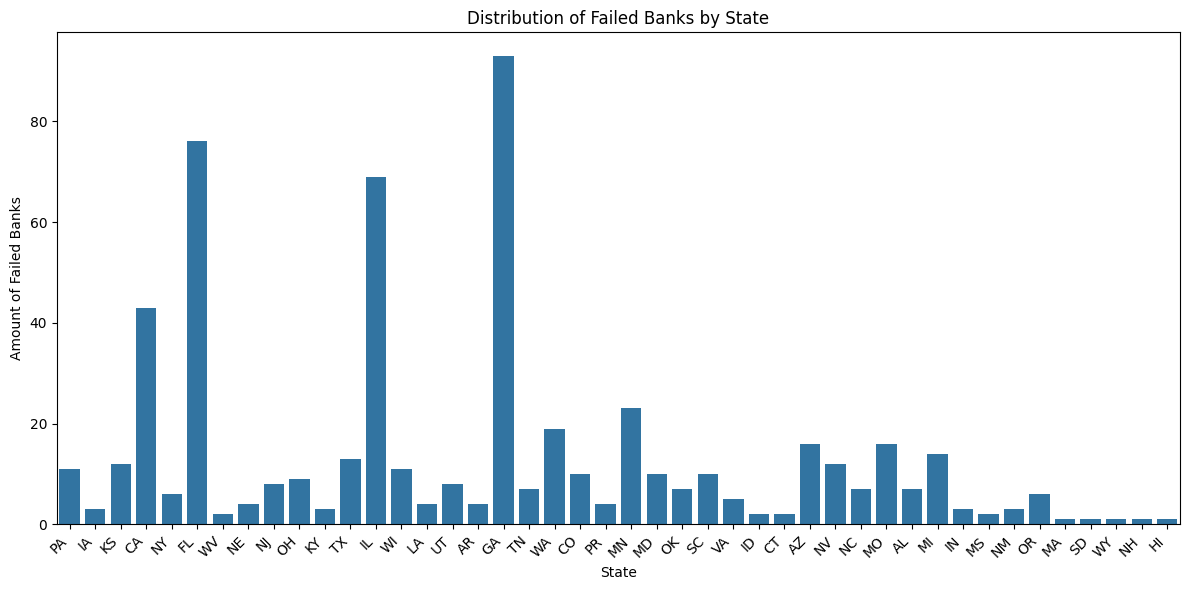

In [10]:
# Create a box plot showing the distribution to remind us of the distribution
plt.figure(figsize=(12,6))
sns.countplot(x = 'State', data = df)

# Readability
plt.xticks(rotation=45, ha='right')

# Title and Labels
plt.title('Distribution of Failed Banks by State')
plt.ylabel('Amount of Failed Banks')

# Show Plot
plt.tight_layout()
plt.show()

In [11]:
# Create map of United States showing bank failures
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']


fig = px.choropleth(state_counts,
                    locations= 'State',
                    locationmode='USA-states',
                    color='Count',
                    scope='usa',
                    color_continuous_scale='Reds',
                    title="Amount of Failed Banks by State")
# Change width and height to fit
fig.update_layout(
    width=1200,
    height=600,
)

# Display interactive plot in Jupyter Notebook
fig.show()



![Amount of Failed Banks by State](failed_banks_map.png)

### State Distribution of Failed Banks: Insights
- The top 4 states with the most amount of failed banks are 1. Georgia, 2. Florida, 3. Illinois, 4. California
- The top 4 states have a significant amount more of failed banks compared to the rest of the country
- There were a few states that had 0 failed banks in the data. Unsure if this is from lack of data or that these states did not have any failed banks. 

### Closing Date Timeline

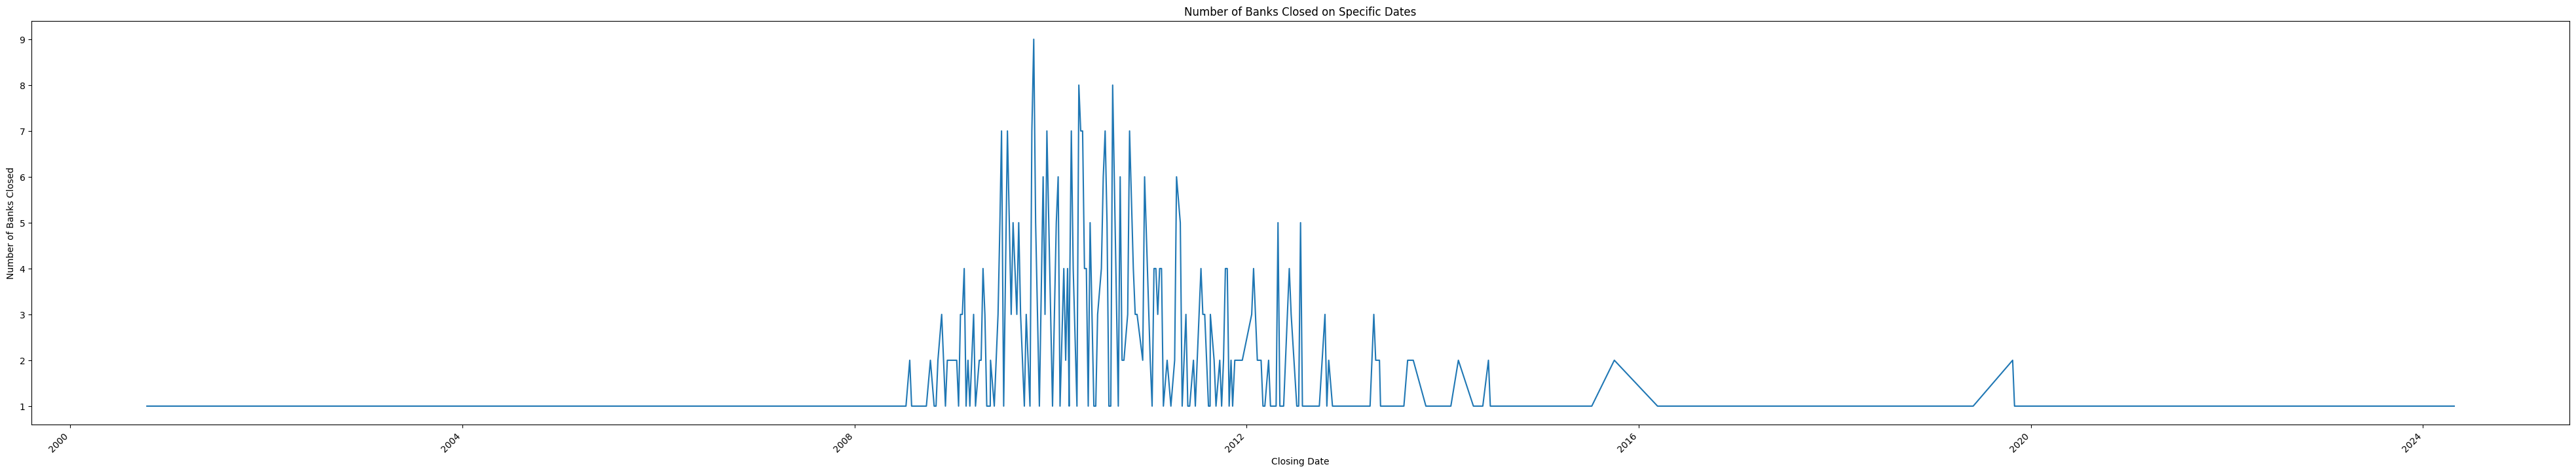

In [15]:
# Create a timline with the closing dates

df['Closing Date'] = pd.to_datetime(df['Closing Date'], format= '%y%m%d')

count_df= df.groupby('Closing Date').size().reset_index(name='Count')

# Create Line Plot
plt.figure(figsize=(50,8))
sns.lineplot(x= 'Closing Date',y= 'Count', data=count_df)

# Adjust x axis
plt.xticks(rotation=45, ha='right')

# Add Title and Labels
plt.title('Number of Banks Closed on Specific Dates')
plt.xlabel('Closing Date')
plt.ylabel('Number of Banks Closed')

# Show Plot
plt.tight_layout
plt.show()

### Closing Date Timeline: Insights
- Each year there was around 1 bank closure except inbetween 2008 and 2016.
- This lines up with the recession of the economy in 2008.
- Overtime it eventually stabalized with 2 spikes up to 2 failed banks in 2016 and 2019.

# <b> Conclusion
There is a slew of data within this data set. There is so much more insights that can be gathered and explored. 